In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

First, let us load correlation matrix as a lazy-load HDF5 dataset. We also load the list of genes.

In [2]:
store = h5py.File("correlations.h5", "r", rdcc_nbytes=(256 << 20))
genes = list(store["genes"][:])
correlations = store["correlations"]

## Correlation matrix

Now, extract a submatrix of the correlation matrix for a set of some interesting genes. Here, we examine genes that are frequently associated to epithelial-mesenchymal transition of cancerous cells.

In [3]:
target_genes = [
    "SNAI1", "SNAI2",
    "ZEB1", "ZEB1-AS1", "ZEB2", "ZEB2-AS1",
    "MIR200A", "VIM", "CDH1", "CDH2",
]
target_corrs = np.eye(len(target_genes))

for i, i_name in enumerate(target_genes):
    i_id = genes.index(i_name)
    for j, j_name in enumerate(target_genes):
        j_id = genes.index(j_name)
        target_corrs[i, j] = correlations[i_id, j_id]

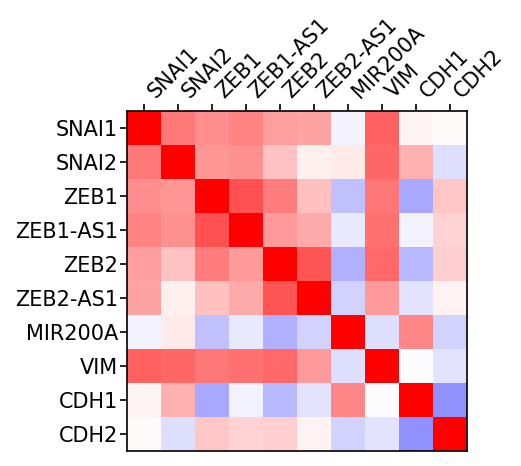

In [4]:
n = len(target_corrs)

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)

ax.matshow(
    target_corrs, extent=[-0.5, n - 0.5, n - 0.5, -0.5], vmin=-1, vmax=1, cmap="bwr",
)

ticks = np.arange(n)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(target_genes, rotation=45, ha="left", va="bottom")
ax.set_yticklabels(target_genes)

ax.tick_params(bottom=False, pad=1)

pass

As widely known, SNAIL genes activate ZEB genes, thus turning on the transcription of mesenchymal marker gene VIM. We can see that in the correlation matrix as a cluster of positively correlated genes.

## Variance of correlation profiles

We can also analyze the variance of correlation profiles of all the genes. Genes with highly variable correlation profile would participate in complex regulation pathways.

In [5]:
chunk_size = 100

mean_corrs = []
stddev_corrs = []
for i in range(0, correlations.shape[0], chunk_size):
    beg = i
    end = min(i + chunk_size, correlations.shape[0])
    chunk = correlations[beg:end]
    mean_corrs.extend(chunk.mean(axis=1))
    stddev_corrs.extend(chunk.std(axis=1))

mean_corrs = np.array(mean_corrs)
stddev_corrs = np.array(stddev_corrs)

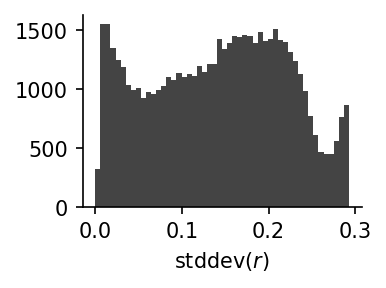

In [6]:
fig, ax = plt.subplots(figsize=(2.4, 1.7), dpi=150)

ax.hist(stddev_corrs, bins=50, color="#444444")
ax.set_xlabel(r"$ \mathrm{stddev}(r) $")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
pass

There seem to be several classes of genes that have characteristic variances in their correlation profiles. We can see at least three:

1. Genes with low variance in their correlation profiles. Supposedly, (a) generally uncorrelated genes, (b) promiscuous activators and (c) promiscuous repressors.
2. Genes with moderate variance in their correlation profiles.
3. Genes with high variance in their correlation profiles. This would be the most interesting class.

In [7]:
bottom_genes = np.argsort(stddev_corrs)[:10]
bottom_genes = [genes[i] for i in bottom_genes]
print("Low-variance genes:", bottom_genes)

Low-variance genes: ['RP11-720L2.4', 'MIR941-3', 'TRAPPC2P9', 'MIR3661', 'FAM90A18P', 'RP11-432M8.2', 'FAM90A16P', 'MIR941-2', 'RN7SKP63', 'RP11-321E2.8']


In [8]:
top_genes = np.argsort(stddev_corrs)[-10:]
top_genes = [genes[i] for i in top_genes]
print("High-variance genes:", top_genes)

High-variance genes: ['CASC23', 'RP1-149M18.3', 'RP11-705O24.1', 'LINC02064', 'LINC01304', 'RP11-561E1.1', 'LINC00690', 'TUSC7', 'DAB1-AS1', 'LINC00927']
